In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd

data = arff.loadarff('../data/3year.arff')
df = pd.DataFrame(data[0])
df_origin = df.copy()
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [2]:
# rename columns
names = ['net profit / total assets', 'total liabilities / total assets', 'working capital / total assets', 'current assets / short-term liabilities',
         '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365', 'retained earnings / total assets',
         'EBIT / total assets', 'book value of equity / total liabilities', 'sales / total assets', 'equity / total assets', '(gross profit + extraordinary items + financial expenses) / total assets',
         'gross profit / short-term liabilities', '(gross profit + depreciation) / sales', '(gross profit + interest) / total assets', '(total liabilities * 365) / (gross profit + depreciation)',
         '(gross profit + depreciation) / total liabilities', 'total assets / total liabilities', 'gross profit / total assets', 'gross profit / sales', '(inventory * 365) / sales',
         'sales (n) / sales (n-1)', 'profit on operating activities / total assets', 'net profit / sales', 'gross profit (in 3 years) / total assets', '(equity - share capital) / total assets',
         '(net profit + depreciation) / total liabilities', 'profit on operating activities / financial expenses', 'working capital / fixed assets', 'logarithm of total assets',
         '(total liabilities - cash) / sales', '(gross profit + interest) / sales', '(current liabilities * 365) / cost of products sold','operating expenses / short-term liabilities',
         'operating expenses / total liabilities', 'profit on sales / total assets', 'total sales / total assets', '(current assets - inventories) / long-term liabilities',
         'constant capital / total assets', 'profit on sales / sales', '(current assets - inventory - receivables) / short-term liabilities',
         'total liabilities / ((profit on operating activities + depreciation) * (12/365))', 'profit on operating activities / sales', 'rotation receivables + inventory turnover in days',
         '(receivables * 365) / sales', 'net profit / inventory', '(current assets - inventory) / short-term liabilities', '(inventory * 365) / cost of products sold',
         'EBITDA (profit on operating activities - depreciation) / total assets', 'EBITDA (profit on operating activities - depreciation) / sales', 'current assets / total liabilities',
         'short-term liabilities / total assets', '(short-term liabilities * 365) / cost of products sold)', 'equity / fixed assets', 'constant capital / fixed assets', 'working capital',
         '(sales - cost of products sold) / sales', '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)', 'total costs /total sales',
         'long-term liabilities / equity', 'sales / inventory', 'sales / receivables', '(short-term liabilities *365) / sales', 'sales / short-term liabilities', 'sales / fixed assets',]

y = df['class']
df = df.iloc[:,0:64]
df.columns = names

In [3]:
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375


Normalization

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(df)
x_scaled_origin = scaler.fit_transform(df_origin)
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

X_scaled_df.head()

X_scaled_df_origin = pd.DataFrame(x_scaled_origin, columns=df_origin.columns)


Heatmap Plotting

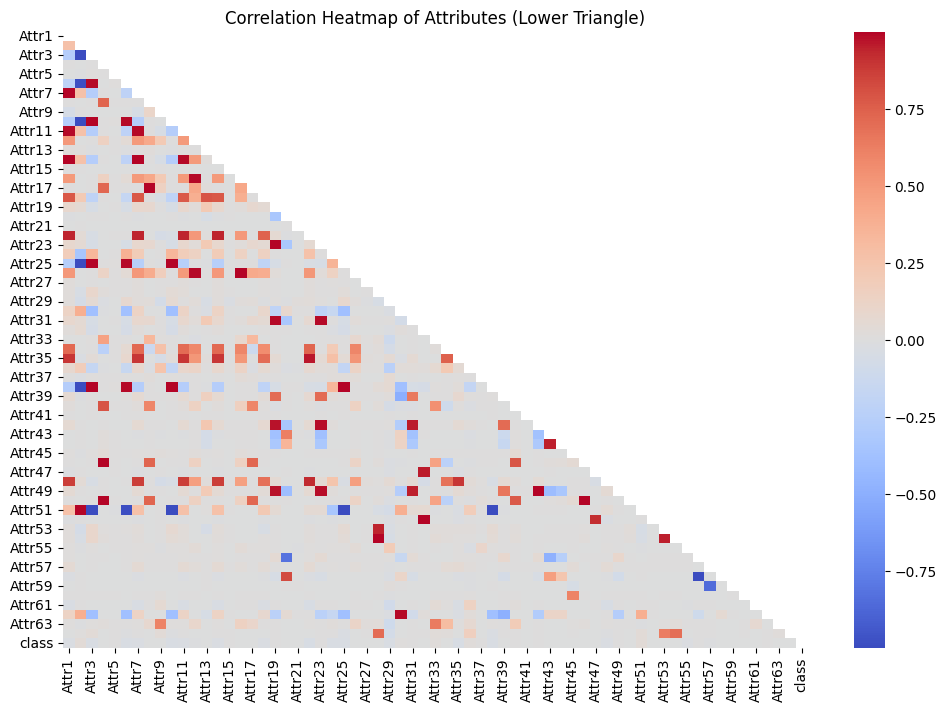

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

def custom_annote(val):
    if val > 0.7 or val < -0.7:
        return val
    else:
        return ''

# Calculate the correlation matrix
corr_matrix = X_scaled_df_origin.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with the mask applied
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', mask=mask)

plt.title('Correlation Heatmap of Attributes (Lower Triangle)')
plt.show()


<Axes: >

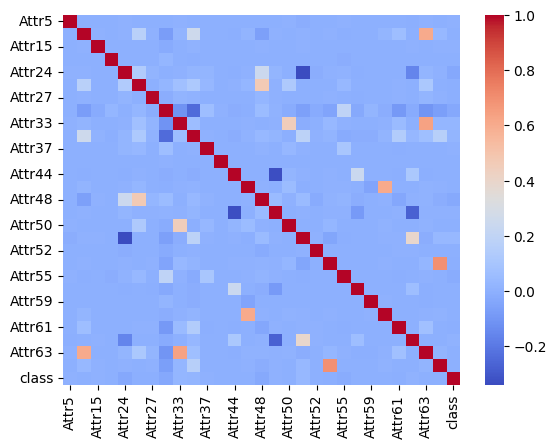

In [24]:
# Set the correlation threshold
threshold = 0.7

# Calculate the correlation matrix
correlation_matrix = X_scaled_df_origin.corr()

attr_list=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            if correlation_matrix.columns[j] not in attr_list:
                attr_list.append(correlation_matrix.columns[j])

X_scaled_df_origin_low_cor = X_scaled_df_origin.drop(columns=attr_list)

sns.heatmap(X_scaled_df_origin_low_cor.corr(), annot= False
            , cmap='coolwarm')


In [25]:
# find pairs with high correlation
high_cor = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            if correlation_matrix.columns[j] != correlation_matrix.columns[i]:
                high_cor.append([correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]])

#print(high_cor[:5])
#len(high_cor)
                
pos_high_cor = []
neg_high_cor = []
for i in range(len(high_cor)):
    if high_cor[i][2] > 0:
        pos_high_cor.append(high_cor[i])
    else:
        neg_high_cor.append(high_cor[i])

#print(len((pos_high_cor)))
print(pos_high_cor[:5])


[['Attr6', 'Attr3', 0.9847540365892046], ['Attr7', 'Attr1', 0.9986695708078653], ['Attr8', 'Attr4', 0.7299698075614232], ['Attr10', 'Attr3', 0.9979245497403467], ['Attr10', 'Attr6', 0.9859983639470575]]


In [26]:
print(X_scaled_df.shape)

(10503, 64)


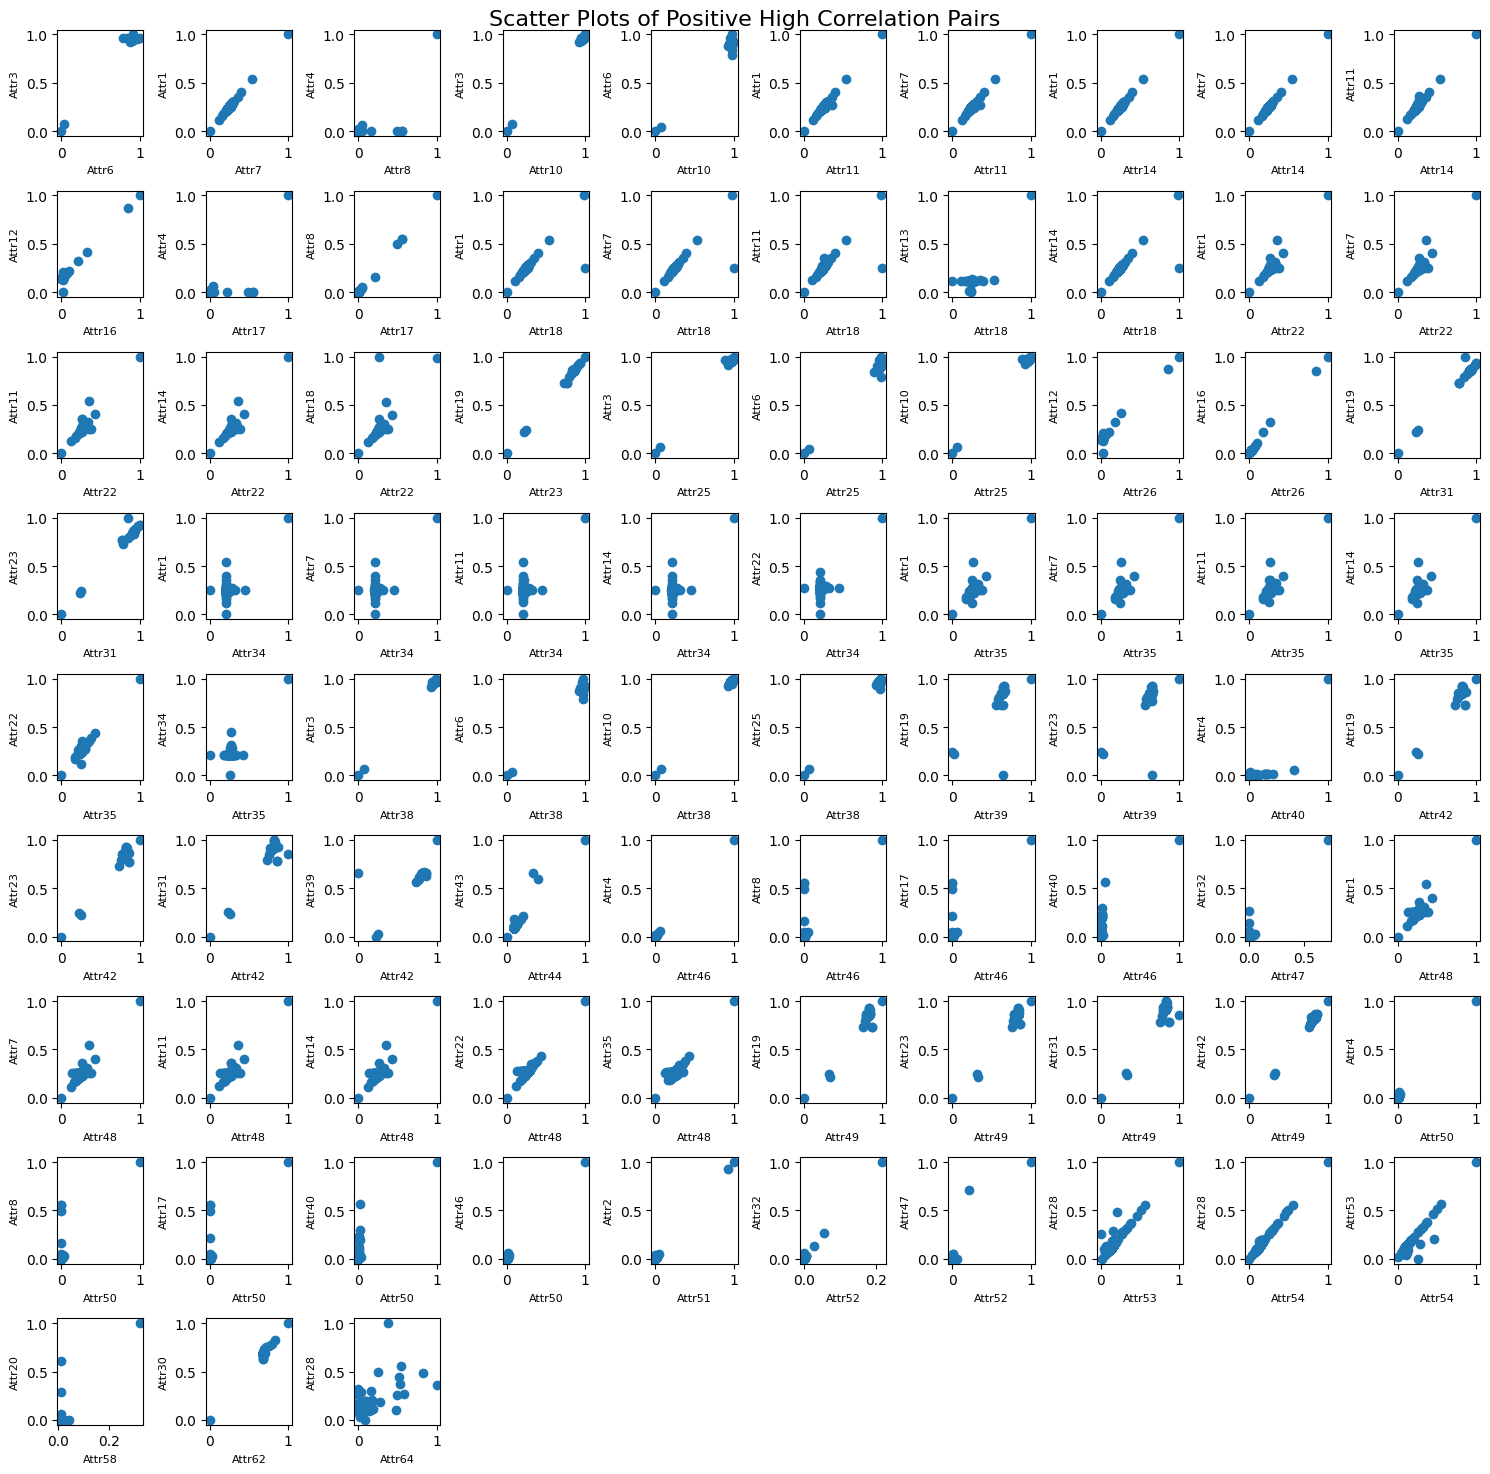

In [30]:
#import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
num_rows = 9  # Adjust this based on the number of pairs you have
num_cols = 10

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each pair of attributes with high correlation
for i, pair in enumerate(pos_high_cor):
    ax = axes[i]
    ax.scatter(X_scaled_df_origin[pair[0]], X_scaled_df_origin[pair[1]])
    ax.set_xlabel(pair[0], fontsize=8)
    ax.set_ylabel(pair[1], fontsize=8)
    #ax.set_title('High Correlation Pair')

# Remove any unused subplots
for i in range(len(pos_high_cor), num_rows*num_cols):
    fig.delaxes(axes[i])
fig.suptitle('Scatter Plots of Positive High Correlation Pairs', fontsize=16)
plt.tight_layout()
plt.show()



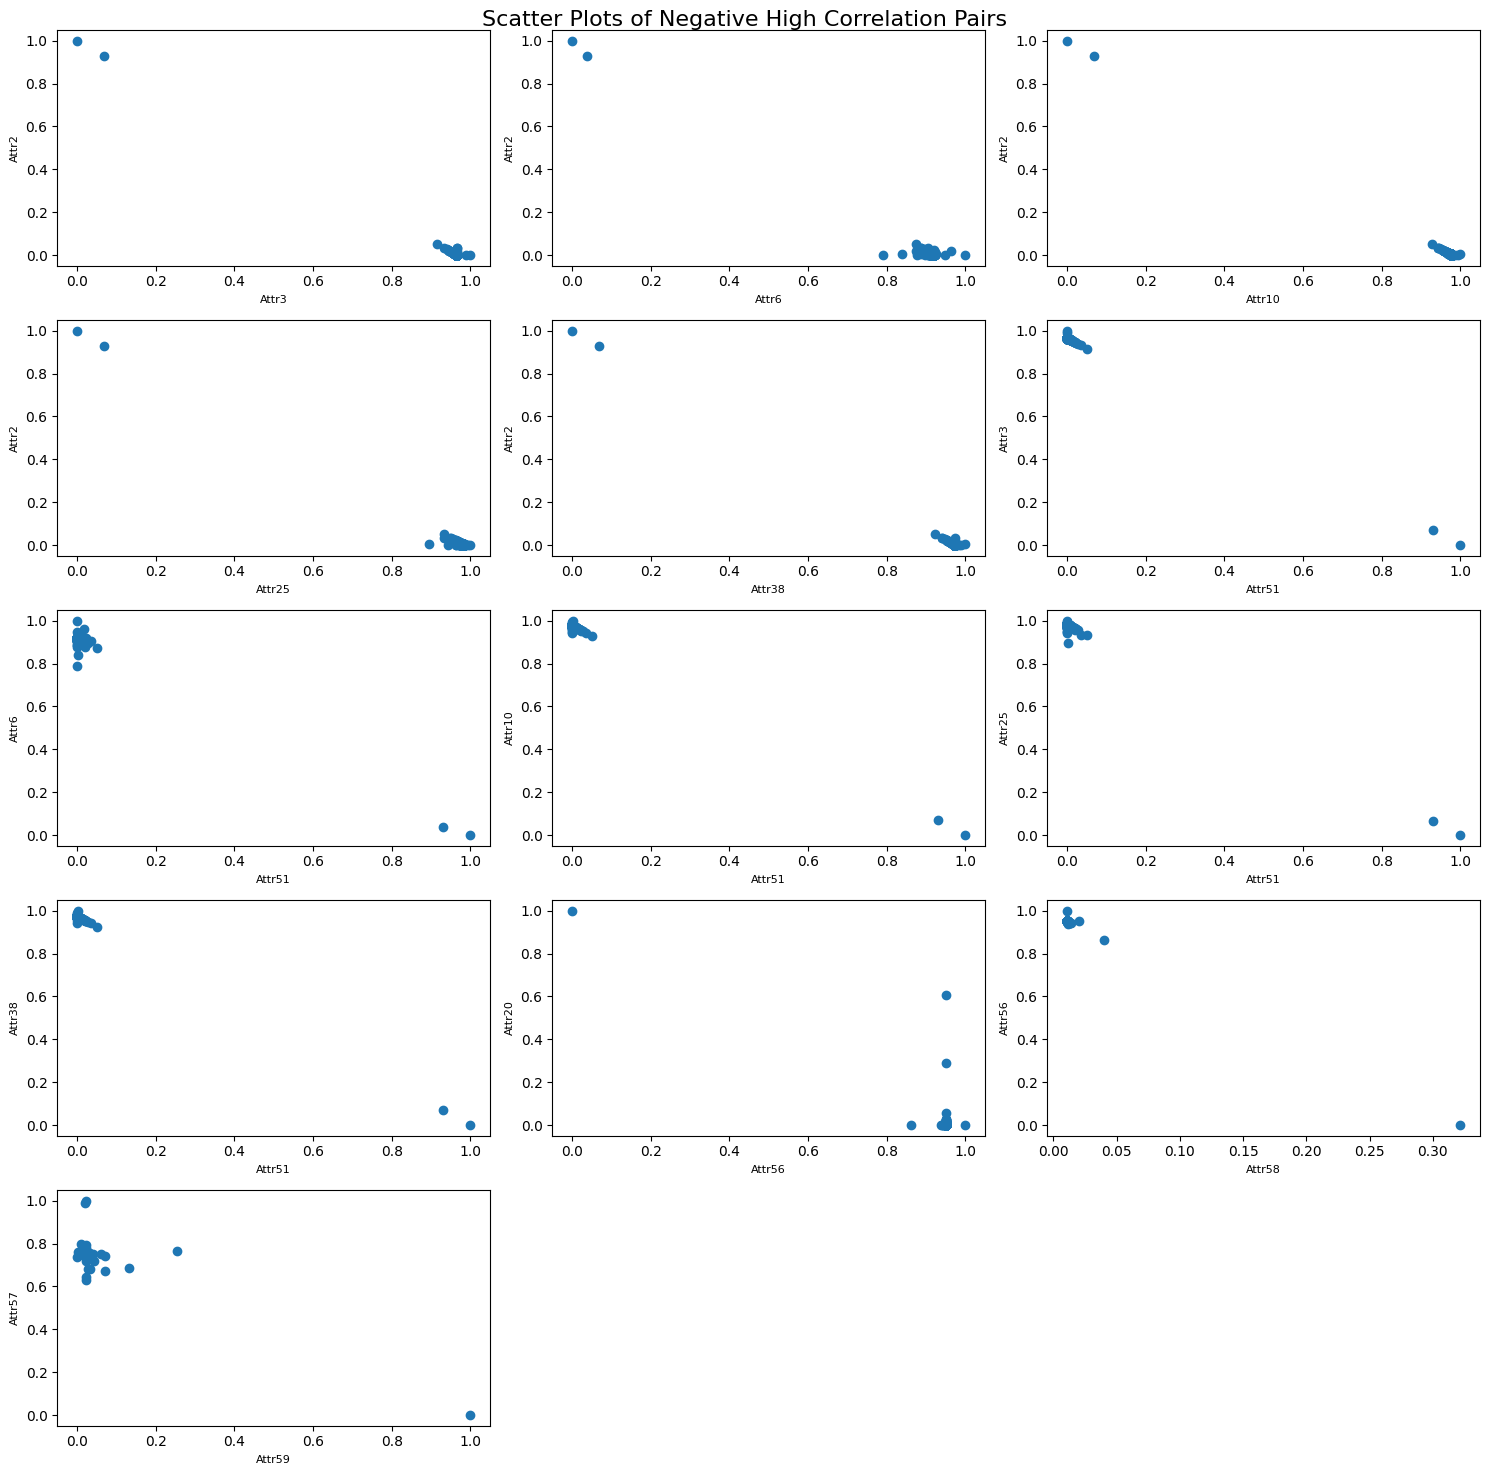

In [32]:
#import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
num_rows = 5 # Adjust this based on the number of pairs you have
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each pair of attributes with high correlation
for i, pair in enumerate(neg_high_cor):
    ax = axes[i]
    ax.scatter(X_scaled_df_origin[pair[0]], X_scaled_df_origin[pair[1]])
    ax.set_xlabel(pair[0], fontsize=8)
    ax.set_ylabel(pair[1], fontsize=8)
    #ax.set_title('High Correlation Pair')

# Remove any unused subplots
for i in range(len(neg_high_cor), num_rows*num_cols):
    fig.delaxes(axes[i])

fig.suptitle('Scatter Plots of Negative High Correlation Pairs', fontsize=16)
plt.tight_layout()
plt.show()

